<a href="https://colab.research.google.com/github/rennyatwork/CegepSteFoy_IA/blob/main/08_deep_learning/tp_01_v06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
#import tensorflow.keras.optimizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import keras as keras
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.callbacks import ModelCheckpoint
import seaborn as sns
from sklearn import linear_model
from sklearn.dummy import DummyRegressor
from sklearn import metrics
import math
from tensorflow.keras.regularizers import l2
import seaborn as sns

In [3]:
#!pip install tensorflow

In [4]:
## column to predict
y_col = 'TotalScore'

## lsit of common columns


In [5]:
def get_df_from_csv(p_path, p_sep=',', p_print=True):
  df= pd.read_csv(p_path, sep= p_sep)
  if (p_print):
    print('---Head---')
    print(df.head())
    print('-- How many nulls? --')
    print(df.isna().sum())
  return df


In [6]:
def get_df_from_csv(p_path, p_sep=',', p_print=True, p_custom_column_names=None):
    if p_custom_column_names is None:
        # Read CSV with header (default behavior)
        df = pd.read_csv(p_path, sep=p_sep)
    else:
        # Read CSV without header and assign custom column names
        df = pd.read_csv(p_path, sep=p_sep, header=None, names=p_custom_column_names)

    if p_print:
        print('---Head---')
        print(df.head())
        print('-- How many nulls? --')
        print(df.isna().sum())

    return df


In [7]:
## Augmented df
def get_augmented_df():
  ## head 400001
  path_csv = "https://raw.githubusercontent.com/rennyatwork/CegepSteFoy_IA/main/08_deep_learning/data/AugmentedData_reduced.csv"
  augmented_df_1 = get_df_from_csv(path_csv, p_sep =",")
  print("shape:", augmented_df_1.shape)
  ## tail 284000
  path_csv = "https://raw.githubusercontent.com/rennyatwork/CegepSteFoy_IA/main/08_deep_learning/data/AugemntedData_reduced_tail.csv"
  augmented_df_2 = get_df_from_csv(path_csv, p_sep =",", p_custom_column_names = augmented_df_1.columns)
  print("shape: ", augmented_df_2.shape)

  return pd.concat([augmented_df_1, augmented_df_2], axis=0, ignore_index=True)

In [8]:
## augmented_df (full augmented_df)
augmented_df = get_augmented_df()
print("[shape]: ", augmented_df.shape)

---Head---
   GameID  ScenarioID  HolesCompletedCount  Hole1  Hole2  Hole3  Hole4  Hole5  \
0       1           1                    0      0      0      0      0      0   
1       2           1                    0      0      0      0      0      0   
2       3           1                    0      0      0      0      0      0   
3       4           1                    0      0      0      0      0      0   
4       5           1                    0      0      0      0      0      0   

   Hole6  Hole7  ...  Hole10  Hole11  Hole12  Hole13  Hole14  Hole15  Hole16  \
0      0      0  ...       0       0       0       0       0       0       0   
1      0      0  ...       0       0       0       0       0       0       0   
2      0      0  ...       0       0       0       0       0       0       0   
3      0      0  ...       0       0       0       0       0       0       0   
4      0      0  ...       0       0       0       0       0       0       0   

   Hole17  Hole18  To

In [9]:
augmented_df.columns

Index(['GameID', 'ScenarioID', 'HolesCompletedCount', 'Hole1', 'Hole2',
       'Hole3', 'Hole4', 'Hole5', 'Hole6', 'Hole7', 'Hole8', 'Hole9', 'Hole10',
       'Hole11', 'Hole12', 'Hole13', 'Hole14', 'Hole15', 'Hole16', 'Hole17',
       'Hole18', 'TotalScore'],
      dtype='object')

In [10]:
## nulls?
print(augmented_df.isnull().sum())
#print(augmented_df[y_col].mode())


GameID                 0
ScenarioID             0
HolesCompletedCount    0
Hole1                  0
Hole2                  0
Hole3                  0
Hole4                  0
Hole5                  0
Hole6                  0
Hole7                  0
Hole8                  0
Hole9                  0
Hole10                 0
Hole11                 0
Hole12                 0
Hole13                 0
Hole14                 0
Hole15                 0
Hole16                 0
Hole17                 0
Hole18                 0
TotalScore             0
dtype: int64


In [11]:
## Original df
path_csv = "https://raw.githubusercontent.com/rennyatwork/CegepSteFoy_IA/main/08_deep_learning/data/OriginalData.csv"
original_df = get_df_from_csv(path_csv, p_sep =",")

---Head---
   GameID  Hole1  Hole2  Hole3  Hole4  Hole5  Hole6  Hole7  Hole8  Hole9  \
0       1      4      6      5      4      6      5      5      3      5   
1       2      3      5      4      4      5      5      6      3      4   
2       3      5      4      6      4      7      4      5      3      5   
3       4      4      4      7      3      6      4      4      4      5   
4       5      4      7      6      4      5      4      5      3      4   

   Hole10  Hole11  Hole12  Hole13  Hole14  Hole15  Hole16  Hole17  Hole18  \
0       4       5       4       4       6       4       5       4       6   
1       5       5       5       4       5       3       4       3       4   
2       6       6       5       4       5       3       5       3       3   
3       7       5       7       4       6       3       6       3       4   
4       6       9       6       3       5       4       5       3       4   

   TotalScore  
0          85  
1          77  
2          83  
3    

In [12]:
## nulls?
original_df.isna().sum()

GameID        0
Hole1         0
Hole2         0
Hole3         0
Hole4         0
Hole5         0
Hole6         0
Hole7         0
Hole8         0
Hole9         0
Hole10        0
Hole11        0
Hole12        0
Hole13        0
Hole14        0
Hole15        0
Hole16        0
Hole17        0
Hole18        0
TotalScore    0
dtype: int64

In [13]:
### Production df
production_df = get_df_from_csv("https://raw.githubusercontent.com/rennyatwork/CegepSteFoy_IA/main/08_deep_learning/data/ProductionData.csv"
, p_sep=';')

---Head---
   GameID  Hole1  Hole2  Hole3  Hole4  Hole5  Hole6  Hole7  Hole8  Hole9  \
0    2001    3.0    4.0    6.0    4.0    6.0    5.0    5.0    6.0    NaN   
1    2002    4.0    5.0    5.0    3.0    6.0    5.0    3.0    4.0    NaN   
2    2003    NaN    7.0    3.0    7.0    4.0    7.0    7.0    4.0    NaN   
3    2004    NaN    3.0    6.0    4.0    7.0    4.0    4.0    3.0    NaN   
4    2005    NaN    NaN    6.0    5.0    5.0    5.0    5.0    7.0    NaN   

   Hole10  Hole11  Hole12  Hole13  Hole14  Hole15  Hole16  Hole17  Hole18  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   TotalScore  
0         NaN  
1         NaN  
2         NaN  
3    

In [14]:
### replace nans with 0
production_df2 = production_df.fillna(0)

In [15]:
production_df.shape

(600, 20)

In [16]:
### augmented_df2 with only columns in common with original_df
augmented_df2 =  augmented_df[original_df.columns]
augmented_df2.shape

(684000, 20)

In [17]:
## most frequent value?
print(original_df[y_col].mode())
print(original_df[y_col].mean())

0    83
Name: TotalScore, dtype: int64
83.0655


In [18]:
### Separates dependent and indepent variables
def get_dfX_dfY(pDf, p_var_y=y_col):
  dfX = pDf.drop(p_var_y, axis=1).values
  dfY = pDf[p_var_y]
  return dfX, dfY

In [19]:
## naïve prediction (baseline) can be original_df[y_col].mode(), original_df[y_col].mean()

In [20]:
## train test split
## we apply the scaler
def get_train_test(pDf=original_df, p_var_y=y_col, p_test_size=0.2, p_random_state=25):
  dfX, dfY = get_dfX_dfY(pDf)
  #dfX = pDf.drop(p_var_y, axis=1).values
  #dfY = pDf[p_var_y]

  # Apply standardization to feature values
  scaler = StandardScaler()
  dfX_standardized = scaler.fit_transform(dfX)

  X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=p_test_size, random_state=p_random_state)
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=p_test_size, random_state=p_random_state)

  return X_train, X_valid, X_test, y_train, y_valid, y_test


########## Establishing a baseline #########

In [21]:
def analyze_dummy(p_df, p_X_train, p_X_valid, p_y_train ,p_y_valid):
  baseline_reg = DummyRegressor()
  baseline_reg.fit(p_X_train, p_y_train)
  print("[score train]", baseline_reg.score(p_X_train, p_y_train))
  print("[score valid]", baseline_reg.score(p_X_valid, p_y_valid))

  y_pred = baseline_reg.predict(p_y_valid)

  print('Root Mean Squared Error - [RMSE]:', round(np.sqrt(metrics.mean_squared_error(p_y_valid, y_pred)),3) )
  print('Mean Squared Error - [MSE]:', round(metrics.mean_squared_error(p_y_valid, y_pred),3) )



In [22]:
## augmented_df
X_train_aug, X_valid_aug, X_test_aug, y_train_aug, y_valid_aug, y_test_aug = get_train_test(augmented_df)
analyze_dummy(augmented_df, X_train_aug, X_valid_aug, y_train_aug, y_valid_aug)

[score train] 0.0
[score valid] -4.922245629757072e-06
Root Mean Squared Error - [RMSE]: 6.976
Mean Squared Error - [MSE]: 48.661


In [23]:
## original df
X_train_orig, X_valid_orig, X_test_orig, y_train_orig, y_valid_orig, y_test_orig = get_train_test(original_df)
analyze_dummy(original_df, X_train_orig, X_valid_orig, y_train_orig, y_valid_orig)

[score train] 0.0
[score valid] -0.000796875625000304
Root Mean Squared Error - [RMSE]: 7.06
Mean Squared Error - [MSE]: 49.844


#############################

Our model must perform better than

Mean Squared Error - [MSE]: 48.661

(Augmented dataset MSE)

#############################


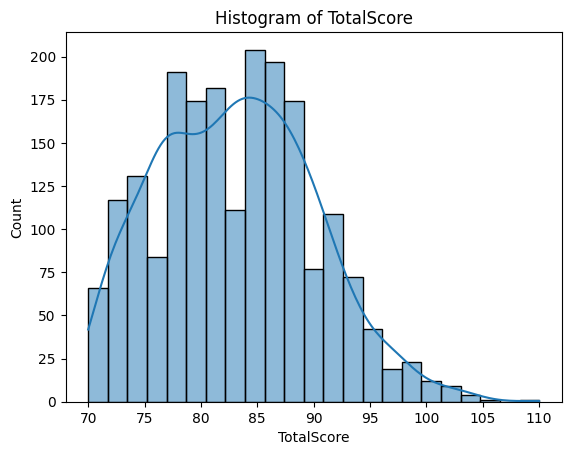

In [26]:
# Histogram
sns.histplot(original_df[y_col], kde=True)
plt.title('Histogram of TotalScore')
plt.show()




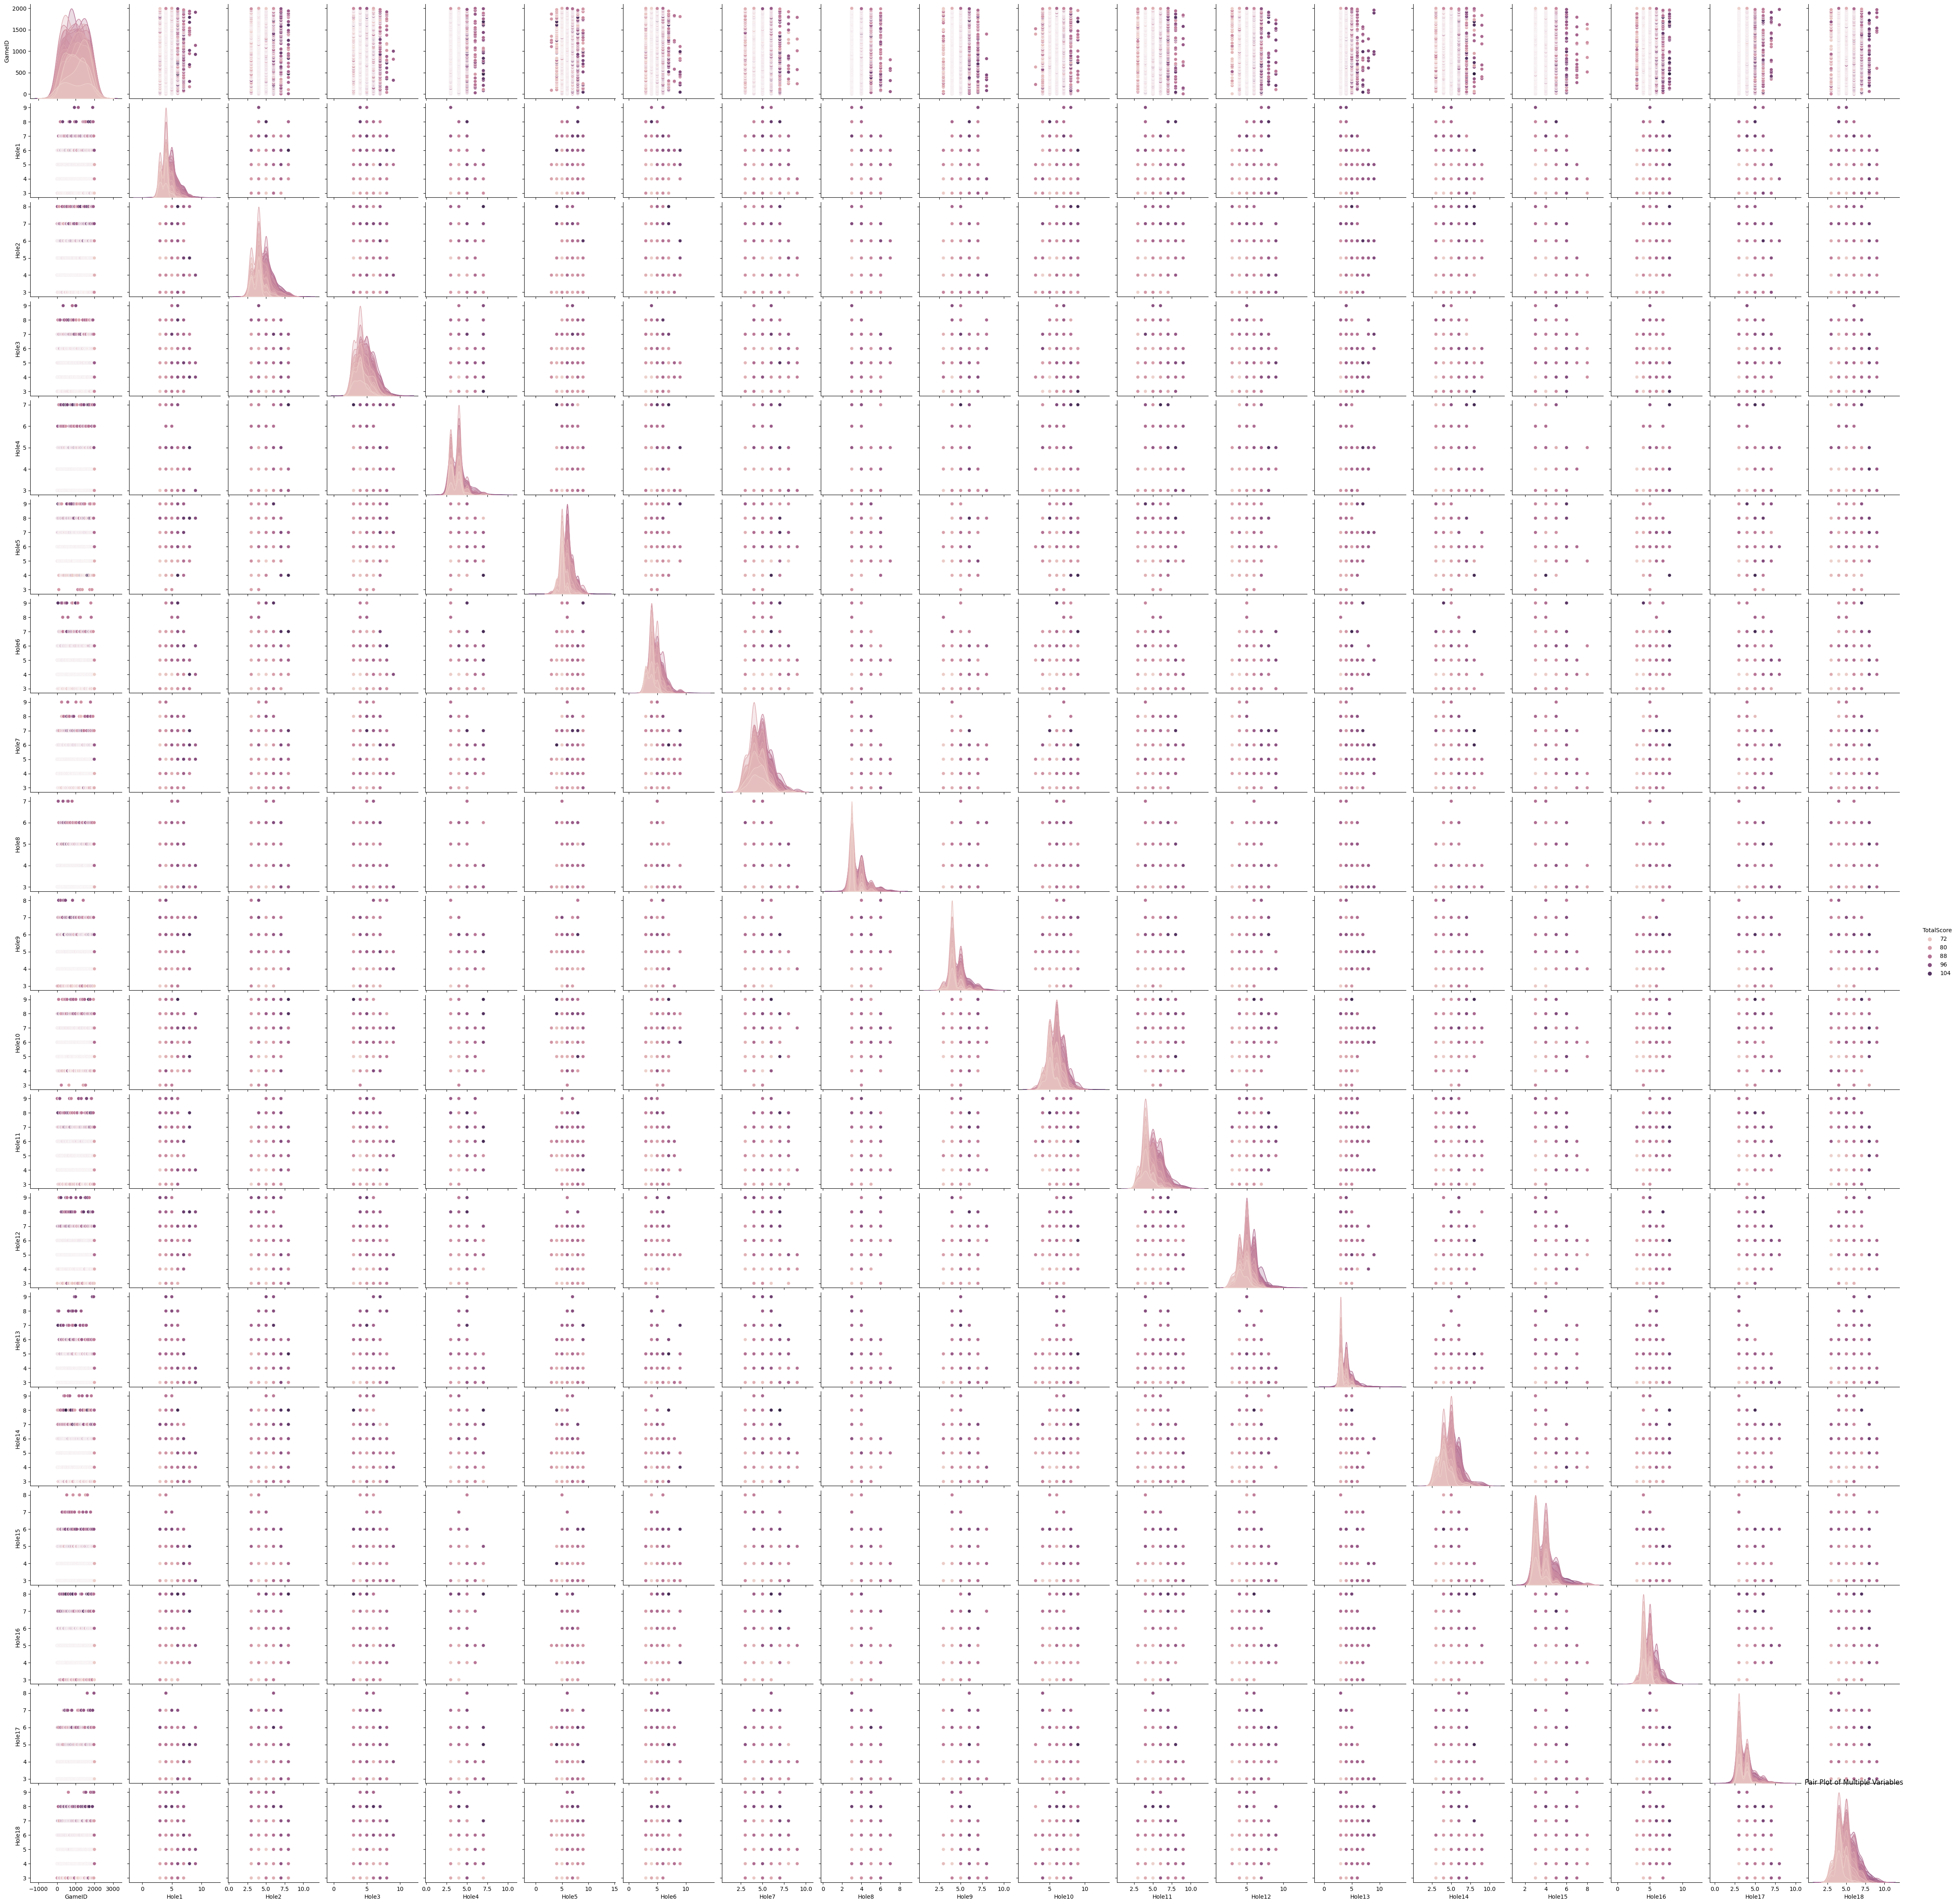

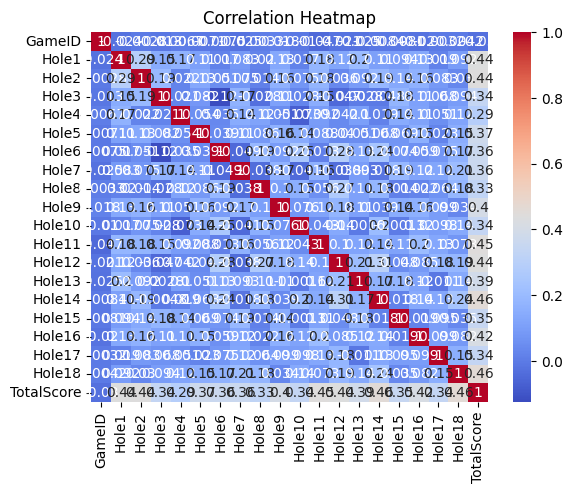

In [24]:
# Pair plot
sns.pairplot(original_df, hue=y_col)
plt.title('Pair Plot of Multiple Variables')
plt.show()

# Heatmap for correlation
correlation_matrix = original_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##############################

Neural network

#################################


In [33]:
## create model
def create_model (p_learning_rate, p_dropout_rate, pDfX, p_nb_neuron_input=128, p_activation='relu', p_kernel_init='he_normal', p_batch_norm=False):
  model = None
  model = Sequential()
  model.add(Dense(p_nb_neuron_input, input_dim=pDfX.shape[1], activation=p_activation, kernel_initializer=p_kernel_init))
  model.add(Dropout(p_dropout_rate))
  if (p_batch_norm):
    model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))

  model.add(Dense(int(p_nb_neuron_input/2), activation=p_activation, kernel_initializer=p_kernel_init))
  model.add(Dropout(p_dropout_rate))
  if (p_batch_norm):
    model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))

  model.add(Dense(int(p_nb_neuron_input/4), activation=p_activation, kernel_initializer=p_kernel_init))
  model.add(Dropout(p_dropout_rate))
  if (p_batch_norm):
    model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))

  model.add(Dense(1))

  adam = Adam(lr = p_learning_rate)

  #model.compile( loss='mean_squared_error', optimizer=adam, metrics=['mae'])
  model.compile( loss='mean_squared_error', optimizer=adam, metrics=['mse'])
  return model


In [34]:
## build model (book HandsOn -on ML, Aurélien Géron)
def build_model (p_input_shape,
                 p_n_hidden=1,
                 p_n_neurons=30,
                 p_learning_rate=3e-3,
                 p_activation='relu',
                 p_debug=True,
                 p_dropout_rate=0.4,
                 p_batch_norm=False):

  if p_debug:
    print("\r\n------[build_model]------")
    print("[p_input_shape]: ", p_input_shape )
    print("[p_n_hidden]: ", p_n_hidden )
    print("[p_n_neurons]: ", p_n_neurons )
    print("[p_learning_rate]: ", p_learning_rate )


  model = Sequential()
  model.add(keras.layers.InputLayer(input_shape=p_input_shape))
  for layer in range(p_n_hidden):
    model.add(keras.layers.Dense(p_n_neurons, activation=p_activation, kernel_regularizer=l2(0.01)))
    model.add(Dropout(p_dropout_rate))

    if (p_batch_norm):
      model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))

    if p_n_hidden >1:
      print('---build_model, for layer in range(p_n_hidden)---')
      print('[p_n_neurons]: ', p_n_neurons)
      ##p_n_neurons =  int(math.sqrt(p_n_neurons))
      p_n_neurons =  int(p_n_neurons/2)

    #keras.layers.BatchNormalization()
  model.add(Dropout(p_dropout_rate))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=p_learning_rate)

  #arr_metrics = ['mae', 'accuracy']
  #arr_metrics = ['mae']
  arr_metrics = ['mse']

  model.compile(loss='mse', optimizer = optimizer, metrics=arr_metrics)
  return model

In [35]:
print(np.sum(np.isnan(X_train_aug)))
print(np.sum(np.isnan(X_valid_aug)))
print(np.sum(np.isnan(X_test_aug)))
print(np.sum(np.isnan(y_train_aug)))
print(np.sum(np.isnan(y_valid_aug)))
print(np.sum(np.isnan(y_test_aug)))

0
0
0
0
0
0


In [113]:
X_train_aug.shape

(437760, 19)

In [36]:
def plot_graph_2(p_model_history, p_var_valid, p_var_test, p_arr_legend):
    # Plot MAE
    plt.plot(p_model_history[p_var_valid])
    plt.plot(p_model_history[p_var_test])

    ## Plot loss
    #plt.plot(p_model_history['loss'])
    #plt.plot(p_model_history['val_loss'])

    ## Add labels and legends for MAE and loss
    #plt.legend(['train MAE', 'test MAE', 'train loss', 'test loss'], loc='upper right')
    plt.legend(p_arr_legend, loc='upper right')
    plt.title('Model Metrics')
    plt.ylabel('Metrics')
    plt.xlabel('Epoch')
    plt.show()






In [37]:
def do_analysis(pModel, pXTrain, pYTrain, pXTest, pYTest,
                p_dropout_rate =0.3
                #, p_learning_rate=0.01
                , p_epochs =30, p_batch_size=10,
                p_validation_split=0.2, p_verbose=True, p_plot_graph=1):

  ## we fit with train
  model_history = pModel.fit(pXTrain, pYTrain, batch_size=p_batch_size, epochs=p_epochs, validation_split = p_validation_split, verbose=1)

  ## we evaluate model's accuracy (use TEST vars, NOT TRAIN)
  score = pModel.evaluate(pXTest, pYTest, verbose=p_verbose)

  print (pModel.summary())
  print("[Loss]: ", score[0])
  print("[MSE]: ", score[1])



  if(p_plot_graph):
    #plot_graph(model_history.history)
    #plot_graph_2(model_history.history, 'mae', 'val_mae', ['train MAE', 'test MAE'])
    plot_graph_2(model_history.history, 'mse', 'val_mse', ['train MSE', 'test MSE'])
    plot_graph_2(model_history.history, 'loss', 'val_loss', ['train LOSS', 'test LOSS'])


In [115]:
X_train_aug.shape[1]

19

Epoch 1/20
35021/35021 [==============================] - 106s 3ms/step - loss: 1261.0912 - mse: 1261.0912 - val_loss: 96.5856 - val_mse: 96.5856
Epoch 2/20
35021/35021 [==============================] - 111s 3ms/step - loss: 294.5173 - mse: 294.5172 - val_loss: 71.1954 - val_mse: 71.1954
Epoch 3/20
35021/35021 [==============================] - 100s 3ms/step - loss: 104.5194 - mse: 104.5194 - val_loss: 50.6144 - val_mse: 50.6144
Epoch 4/20
35021/35021 [==============================] - 101s 3ms/step - loss: 52.9092 - mse: 52.9092 - val_loss: 48.4038 - val_mse: 48.4038
Epoch 5/20
35021/35021 [==============================] - 100s 3ms/step - loss: 48.5278 - mse: 48.5278 - val_loss: 48.1963 - val_mse: 48.1963
Epoch 6/20
35021/35021 [==============================] - 113s 3ms/step - loss: 46.7161 - mse: 46.7161 - val_loss: 49.0947 - val_mse: 49.0947
Epoch 7/20
35021/35021 [==============================] - 108s 3ms/step - loss: 46.4928 - mse: 46.4928 - val_loss: 49.3145 - val_mse: 49.314

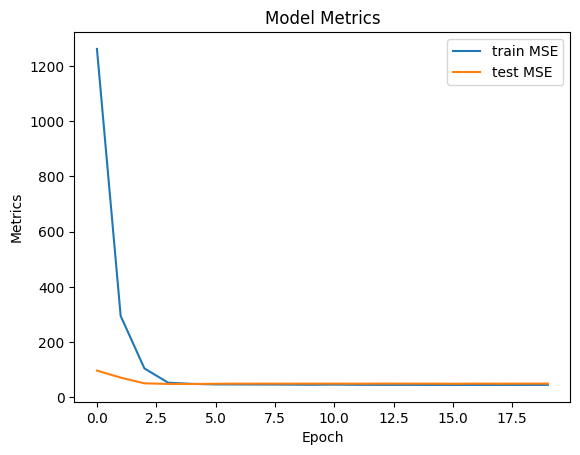

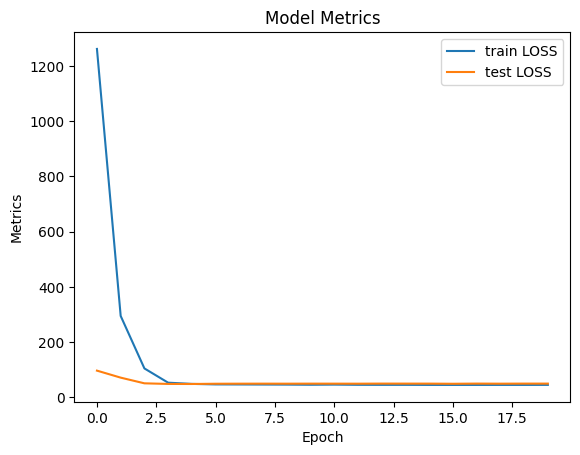

In [116]:
## Model evaluation
model = create_model (0.001, 0.3, X_train_aug, p_nb_neuron_input = X_train_aug.shape[1], p_batch_norm=False)
do_analysis(model, X_train_aug, y_train_aug, X_test_aug
            , y_test_aug, p_learning_rate =0.0001
            , p_epochs=20, p_verbose=0)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5632      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

Epoch 1/50
103/103 [==============================] - 4s 6ms/step - loss: 6933.9067 - mse: 6933.9067 - val_loss: 6899.0083 - val_mse: 6899.0083
Epoch 2/50
103/103 [==============================] - 0s 5ms/step - loss: 6824.1680 - mse: 6824.1680 - val_loss: 6647.1953 - val_mse: 6647.1953
Epoch 3/50
103/103 [==============================] - 0s 4ms/step - loss: 6641.7324 - mse: 6641.7324 - val_loss: 6424.4775 - val_mse: 6424.4775
Epoch 4/50
103/103 [==============================] - 0s 4ms/step - loss: 6383.8027 - mse: 6383.8027 - val_loss: 6124.5869 - val_mse: 6124.5869
Epoch 5/50
103/103 [==============================] - 0s 4ms/step - loss: 6059.7686 - mse: 6059.7686 - val_loss: 5755.3950 - val_mse: 5755.3950
Epoch 6/50
103/103 [==============================] - 0s 4ms/step - loss: 5683.0156 - mse: 5683.0161 - val_loss: 5474.7314 - val_mse: 5474.7314
Epoch 7/50
103/103 [==============================] - 0s 4ms/step - loss: 5261.6245 - mse: 5261.6245 - val_loss: 4926.7505 - val_mse: 49

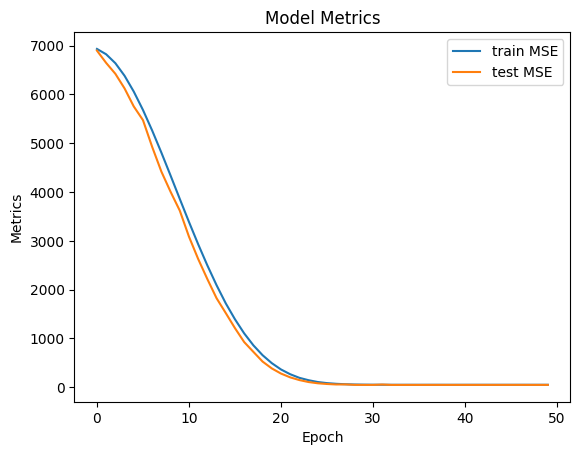

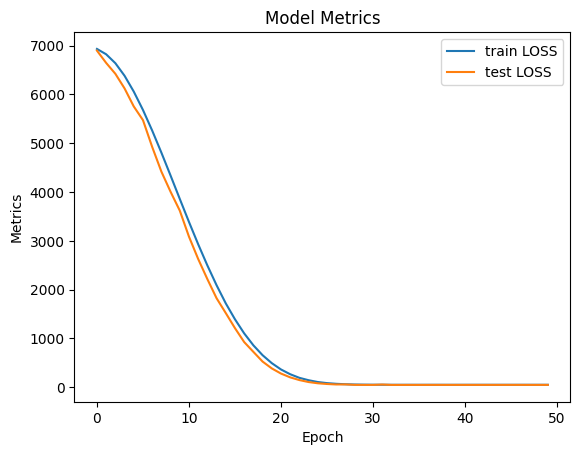

In [38]:
## Model evaluation
model = create_model (0.0003, 0.45, X_train_orig, p_nb_neuron_input = X_train_orig.shape[1]*2, p_batch_norm=True)
do_analysis(model, X_train_orig, y_train_orig, X_test_orig
            , y_test_orig #, p_learning_rate =0.0002
            , p_epochs=50, p_verbose=0)

In [31]:
original_df[original_df[y_col]<=95]

GameID  Hole1  Hole2  Hole3  Hole4  Hole5  Hole6  Hole7  Hole8  Hole9  \
0          1      4      6      5      4      6      5      5      3      5   
1          2      3      5      4      4      5      5      6      3      4   
2          3      5      4      6      4      7      4      5      3      5   
3          4      4      4      7      3      6      4      4      4      5   
4          5      4      7      6      4      5      4      5      3      4   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1995    1996      4      4      3      4      6      5      6      3      4   
1996    1997      5      4      5      6      6      6      6      3      5   
1997    1998      5      4      4      4      5      4      4      3      4   
1998    1999      5      4      4      6      6      6      4      3      5   
1999    2000      5      4      6      4      5      3      4      3      4   

      Hole10  Hole11  Hole12  Hole13  Hole14  Hole15  Hole16  Hole17  Hole18  \
0          4       5       4       4       6       4       5       4       6   
1          5       5       5       4       5       3       4       3       4   
2          6       6       5       4       5       3       5       3       3   
3          7       5       7       4       6       3       6       3       4   
4          6       9       6       3       5       4       5       3       4   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1995       7       5       6       4       4       5       5       4       4   
1996       6       7       5       4       7       4       5       4       5   
1997       5       5       4       3       3       3       3       3       4   
1998       6       7       5       4       7       4       5       4       4   
1999       5       5       4       3       3       4       5       4       5   

      TotalScore  
0             85  
1             77  
2             83  
3             86  
4             87  
...          ...  
1995          83  
1996          93  
1997          70  
1998          89  
1999          76  

[1910 rows x 20 columns]

(1889, 20)
[score train] 0.0
[score valid] -0.0004800204040267264
Root Mean Squared Error - [RMSE]: 6.219
Mean Squared Error - [MSE]: 38.672
Epoch 1/60
97/97 [==============================] - 5s 6ms/step - loss: 6771.0000 - mse: 6770.9995 - val_loss: 6680.9854 - val_mse: 6680.9854
Epoch 2/60
97/97 [==============================] - 1s 7ms/step - loss: 6669.5933 - mse: 6669.5933 - val_loss: 6520.4468 - val_mse: 6520.4468
Epoch 3/60
97/97 [==============================] - 1s 6ms/step - loss: 6504.7954 - mse: 6504.7954 - val_loss: 6407.0654 - val_mse: 6407.0654
Epoch 4/60
97/97 [==============================] - 1s 6ms/step - loss: 6276.4756 - mse: 6276.4756 - val_loss: 6095.1362 - val_mse: 6095.1362
Epoch 5/60
97/97 [==============================] - 1s 6ms/step - loss: 5992.6465 - mse: 5992.6465 - val_loss: 5709.8877 - val_mse: 5709.8877
Epoch 6/60
97/97 [==============================] - 1s 7ms/step - loss: 5652.5107 - mse: 5652.5107 - val_loss: 5396.6538 - val_mse: 5396.6538
Epoch 7

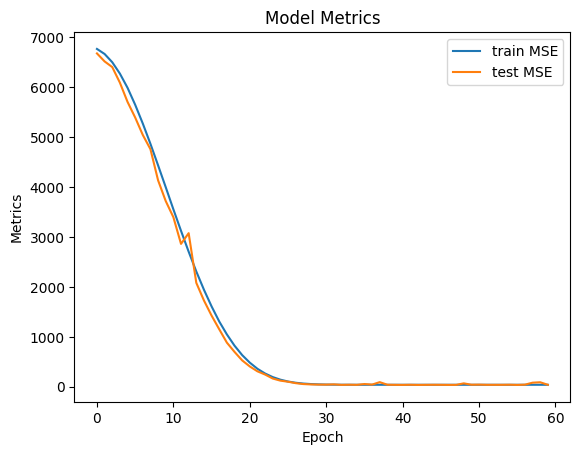

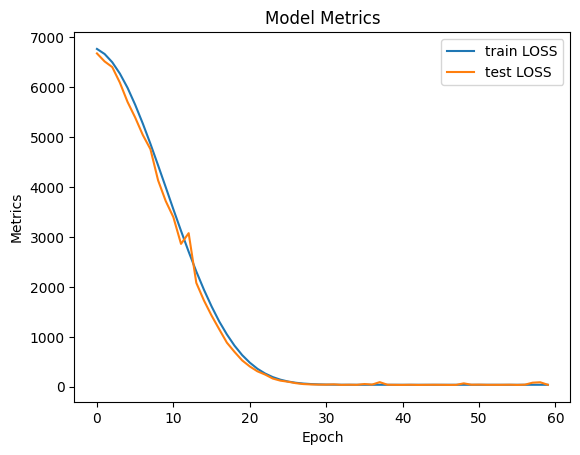

In [60]:
### what if we cut some extreme values??
#new_orig_df = original_df[(original_df[y_col]<94) & (original_df[y_col]>70)]
new_orig_df = original_df[(original_df[y_col]<95) ]

print(new_orig_df.shape)

## new original df
X_train_orig_2, X_valid_orig_2, X_test_orig_2, y_train_orig_2, y_valid_orig_2, y_test_orig_2 = get_train_test(new_orig_df)
analyze_dummy(new_orig_df, X_train_orig_2, X_valid_orig_2, y_train_orig_2, y_valid_orig_2)

## Model evaluation
model = create_model (0.00025, 0.5, X_train_orig_2, p_nb_neuron_input = X_train_orig_2.shape[1]*2, p_batch_norm=True)
do_analysis(model, X_train_orig_2, y_train_orig_2, X_test_orig_2
            , y_test_orig_2 #, p_learning_rate =0.0002
            , p_epochs=60, p_verbose=0)

In [141]:
orig_dfX, orig_dfY = get_dfX_dfY(original_df)
orig_predictions = model.predict(orig_dfX)
orig_predictions



63/63 [==============================] - 0s 5ms/step


array([[84.64131],
       [84.80095],
       [89.08947],
       ...,
       [83.16976],
       [83.16694],
       [83.16451]], dtype=float32)

In [61]:
orig_dfX_2, orig_dfY_2 = get_dfX_dfY(new_orig_df)
orig_predictions_2 = model.predict(orig_dfX_2)
orig_predictions_2

60/60 [==============================] - 0s 3ms/step


array([[110.15298 ],
       [100.521324],
       [102.8787  ],
       ...,
       [ 82.16336 ],
       [ 82.16386 ],
       [ 82.16344 ]], dtype=float32)

In [120]:
prod_2_dfX, prod_2_dfY = get_dfX_dfY(production_df2)
prod_predictions = model.predict(prod_2_dfX)
prod_predictions

19/19 [==============================] - 0s 2ms/step


array([[82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],
       [82.21306 ],


In [34]:
#model.save('create_model.h5')

In [35]:
!pwd

/content


In [37]:
#from google.colab import files
#files.download('create_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/40
103/103 [==============================] - 3s 6ms/step - loss: 6915.8740 - mse: 6915.8740 - val_loss: 6803.2979 - val_mse: 6803.2979
Epoch 2/40
103/103 [==============================] - 0s 4ms/step - loss: 6775.6665 - mse: 6775.6665 - val_loss: 6519.3232 - val_mse: 6519.3242
Epoch 3/40
103/103 [==============================] - 0s 4ms/step - loss: 6561.7993 - mse: 6561.7993 - val_loss: 6328.6484 - val_mse: 6328.6484
Epoch 4/40
103/103 [==============================] - 0s 4ms/step - loss: 6285.1006 - mse: 6285.1006 - val_loss: 5921.8447 - val_mse: 5921.8447
Epoch 5/40
103/103 [==============================] - 0s 4ms/step - loss: 5946.5591 - mse: 5946.5591 - val_loss: 5608.4575 - val_mse: 5608.4575
Epoch 6/40
103/103 [==============================] - 0s 4ms/step - loss: 5560.4219 - mse: 5560.4219 - val_loss: 5140.9399 - val_mse: 5140.9399
Epoch 7/40
103/103 [==============================] - 0s 4ms/step - loss: 5133.7959 - mse: 5133.7959 - val_loss: 4778.4746 - val_mse: 47

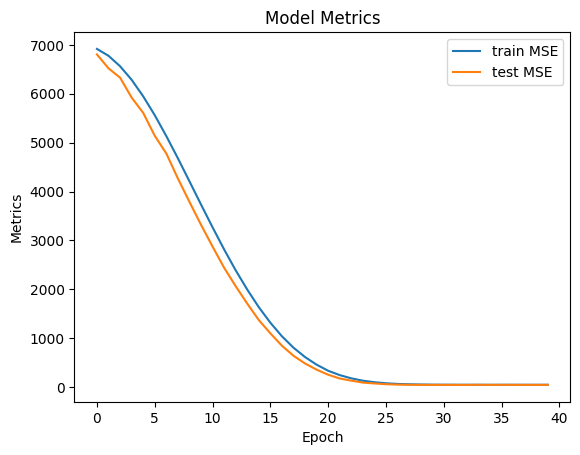

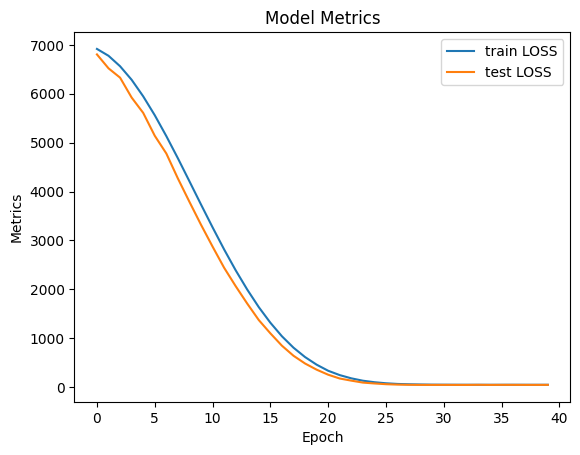

In [143]:
## Modele valuation - batch normalization = True
model = create_model (0.0003, 0.3, X_train_orig, p_nb_neuron_input = X_train_orig.shape[1]*2, p_batch_norm=True)
do_analysis(model, X_train_orig, y_train_orig, X_test_orig
            , y_test_orig
            , p_epochs=40, p_verbose=0)

Epoch 1/60
97/97 [==============================] - 5s 9ms/step - loss: 6766.2881 - mse: 6766.2881 - val_loss: 6717.6772 - val_mse: 6717.6772
Epoch 2/60
97/97 [==============================] - 1s 6ms/step - loss: 6655.6802 - mse: 6655.6802 - val_loss: 6580.6836 - val_mse: 6580.6836
Epoch 3/60
97/97 [==============================] - 1s 6ms/step - loss: 6479.8857 - mse: 6479.8857 - val_loss: 6367.7217 - val_mse: 6367.7217
Epoch 4/60
97/97 [==============================] - 1s 6ms/step - loss: 6242.5264 - mse: 6242.5264 - val_loss: 6118.3291 - val_mse: 6118.3296
Epoch 5/60
97/97 [==============================] - 1s 6ms/step - loss: 5950.6392 - mse: 5950.6392 - val_loss: 5765.9922 - val_mse: 5765.9922
Epoch 6/60
97/97 [==============================] - 1s 6ms/step - loss: 5604.9722 - mse: 5604.9722 - val_loss: 5392.7788 - val_mse: 5392.7788
Epoch 7/60
97/97 [==============================] - 1s 8ms/step - loss: 5225.7700 - mse: 5225.7700 - val_loss: 5004.5469 - val_mse: 5004.5469
Epoch 

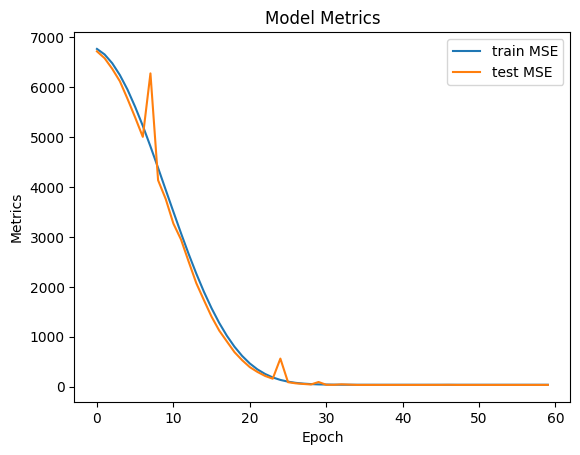

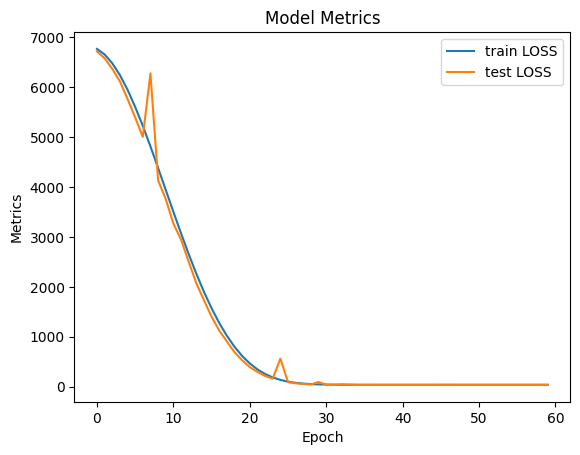

In [62]:
## Modele valuation - batch normalization = True
model = create_model (0.00025, 0.5, X_train_orig_2, p_nb_neuron_input = X_train_orig_2.shape[1]*2, p_batch_norm=True)
do_analysis(model, X_train_orig_2, y_train_orig_2, X_test_orig_2
            , y_test_orig_2
            , p_epochs=60, p_verbose=0)

In [69]:
# Split your data and define input_shape
input_shape = X_train_orig_2.shape[1]  # Number of features

# Create the KerasRegressor with your build_model function
keras_reg = KerasRegressor(build_fn=build_model
                           , p_input_shape=input_shape
                           , p_n_hidden=2
                           , p_n_neurons=input_shape*2
                           , p_learning_rate=3e-4
                           , p_activation='relu'
                           , p_dropout_rate=0.5
                           , p_batch_norm=True)

keras_reg.fit( X_train_orig_2, y_train_orig_2, epochs = 60,
              validation_data=(X_valid_orig_2, y_valid_orig_2),
              callbacks=[keras.callbacks.EarlyStopping(patience=20)])

msa_test = keras_reg.score(X_test_orig_2, y_test_orig_2)
y_pred = keras_reg.predict(X_test_orig_2)

# Calculate Mean Squared Error (MSE)
#print('y_test: ', y_test_orig.isna().sum())
dfYPred = pd.DataFrame(y_pred)
print('y_pred: ', dfYPred.isna().sum())
mse = mean_squared_error(y_test_orig_2, y_pred)
mse_test = -msa_test

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test_orig_2, y_pred)

print("[MSE] Mean Squared Error:", mse)
print("[MSE test] Mean Squared Error:", mse_test)
print("R-squared:", r2)

<ipython-input-69-4c5bfd2aa136>:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_model
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



------[build_model]------
[p_input_shape]:  19
[p_n_hidden]:  2
[p_n_neurons]:  38
[p_learning_rate]:  0.0003
---build_model, for layer in range(p_n_hidden)---
[p_n_neurons]:  38
---build_model, for layer in range(p_n_hidden)---
[p_n_neurons]:  19
Epoch 1/60
38/38 [==============================] - 2s 13ms/step - loss: 6042.7549 - mse: 6042.2275 - val_loss: 4186.9321 - val_mse: 4186.2466
Epoch 2/60
38/38 [==============================] - 0s 5ms/step - loss: 1938.7208 - mse: 1938.0240 - val_loss: 130.6301 - val_mse: 129.9237
Epoch 3/60
38/38 [==============================] - 0s 4ms/step - loss: 529.1314 - mse: 528.4221 - val_loss: 48.7504 - val_mse: 48.0378
Epoch 4/60
38/38 [==============================] - 0s 4ms/step - loss: 475.6342 - mse: 474.9200 - val_loss: 54.4285 - val_mse: 53.7129
Epoch 5/60
38/38 [==============================] - 0s 4ms/step - loss: 476.0356 - mse: 475.3188 - val_loss: 63.3014 - val_mse: 62.5838
Epoch 6/60
38/38 [==============================] - 0s 5ms/s

In [ ]:
input_shape

43

In [66]:
input_shape = X_train_orig_2.shape[1]
# Create the KerasRegressor with your build_model function
keras_reg = KerasRegressor(build_fn=build_model
                           , p_input_shape=input_shape
                           , p_n_hidden=1
                           , p_n_neurons=input_shape*2
                           , p_learning_rate=3e-4
                           , p_activation='relu'
                           , p_dropout_rate=0.5
                           , p_batch_norm=False)

keras_reg.fit( X_train_orig_2, y_train_orig_2, epochs = 30,
              validation_data=(X_valid_orig_2, y_valid_orig_2),
              callbacks=[keras.callbacks.EarlyStopping(patience=15)])

msa_test = keras_reg.score(X_test_orig_2, y_test_orig_2)
y_pred = keras_reg.predict(X_test_orig_2)

# Calculate Mean Squared Error (MSE)
print('y_test: ', y_test_orig_2.isna().sum())
dfYPred = pd.DataFrame(y_pred)
print('y_pred: ', dfYPred.isna().sum())
mse = mean_squared_error(y_test_orig, y_pred)
mse_test = -msa_test

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test_orig_2, y_pred)

print("[MSE] Mean Squared Error:", mse)
print("[MSE test] Mean Squared Error:", mse_test)
print("R-squared:", r2)

<ipython-input-66-8fd781dc469c>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=build_model
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



------[build_model]------
[p_input_shape]:  19
[p_n_hidden]:  1
[p_n_neurons]:  38
[p_learning_rate]:  0.0003
Epoch 1/30
38/38 [==============================] - 2s 19ms/step - loss: 1125387190826696704.0000 - mse: 89241526730752.0000 - val_loss: 1649416013172703232.0000 - val_mse: 267533824.0000
Epoch 2/30
38/38 [==============================] - 0s 12ms/step - loss: 1649104988820996096.0000 - mse: 423393001472.0000 - val_loss: 1648951744387874816.0000 - val_mse: 295917440.0000
Epoch 3/30
38/38 [==============================] - 0s 13ms/step - loss: 1648589455306522624.0000 - mse: 289481280.0000 - val_loss: 1648202014896685056.0000 - val_mse: 282722944.0000
Epoch 4/30
38/38 [==============================] - 1s 18ms/step - loss: 1647839588376379392.0000 - mse: 276573600.0000 - val_loss: 1647452422844448768.0000 - val_mse: 270116576.0000
Epoch 5/30
38/38 [==============================] - 0s 13ms/step - loss: 1647089996324143104.0000 - mse: 264241312.0000 - val_loss: 16467033805480263

ValueError: ignored

In [ ]:
X_train.shape

(437759, 43)

In [72]:
# Define the checkpoint callback
checkpoint_cb = ModelCheckpoint(filepath="best_model.h5", save_best_only=True)

# Other callbacks you might have (e.g., EarlyStopping)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3)

param_distribs = {
    "p_n_hidden": [1,2,3,4],
    "p_n_neurons": np.arange(X_train_aug.shape[1], X_train_aug.shape[1]*2),
    "p_learning_rate" : reciprocal(1e-4, 5e-3)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=3
                                   , cv=5
                                   , scoring='neg_mean_squared_error')

rnd_search_cv.fit(X_train_orig_2, y_train_orig_2, epochs=80,
                  validation_data=(X_valid_orig_2, y_valid_orig_2),
                  callbacks=[checkpoint_cb, early_stopping_cb])

# Access the best model and print its summary
best_model = rnd_search_cv.best_estimator_.model
print('================================')
print('-- Best Model Summary --')
best_model.summary()
print('-- Best params --')
print(rnd_search_cv.best_params_)
print('-- Best score --')
print(rnd_search_cv.best_score_)




------[build_model]------
[p_input_shape]:  19
[p_n_hidden]:  2
[p_n_neurons]:  31
[p_learning_rate]:  0.0003807273019065787
---build_model, for layer in range(p_n_hidden)---
[p_n_neurons]:  31
---build_model, for layer in range(p_n_hidden)---
[p_n_neurons]:  15
Epoch 1/80
31/31 [==============================] - 1s 13ms/step - loss: 6077.8257 - mse: 6077.4028 - val_loss: 4371.5586 - val_mse: 4371.1289
Epoch 2/80
31/31 [==============================] - 0s 6ms/step - loss: 1977.1093 - mse: 1976.6382 - val_loss: 260.4414 - val_mse: 259.9594
Epoch 3/80
31/31 [==============================] - 0s 6ms/step - loss: 729.1141 - mse: 728.6290 - val_loss: 83.4507 - val_mse: 82.9619
Epoch 4/80
31/31 [==============================] - 0s 5ms/step - loss: 558.6519 - mse: 558.1611 - val_loss: 90.4187 - val_mse: 89.9258
Epoch 5/80
31/31 [==============================] - 0s 4ms/step - loss: 590.2882 - mse: 589.7944 - val_loss: 107.7331 - val_mse: 107.2382
Epoch 6/80
8/8 [===========================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 11ms/step - loss: 6049.1719 - mse: 6048.5942 - val_loss: 4257.5391 - val_mse: 4256.8184
Epoch 2/80
31/31 [==============================] - 0s 4ms/step - loss: 1998.8778 - mse: 1997.9108 - val_loss: 278.0245 - val_mse: 276.9319
Epoch 3/80
31/31 [==============================] - 0s 4ms/step - loss: 710.1987 - mse: 709.1035 - val_loss: 128.1651 - val_mse: 127.0650
Epoch 4/80
31/31 [==============================] - 0s 5ms/step - loss: 646.5383 - mse: 645.4364 - val_loss: 62.0709 - val_mse: 60.9669
Epoch 5/80
31/31 [==============================] - 0s 5ms/step - loss: 564.8788 - mse: 563.7740 - val_loss: 79.6504 - val_mse: 78.5444
Epoch 6/80
31/31 [==============================] - 0s 4ms/step - loss: 561.2605 - mse: 560.1539 - val_loss: 66.4087 - val_mse: 65.3009
Epoch 7/80
8/8 [==============================] - 0s 2ms/step

------[build_model]------
[p_input_shape]:  19
[p_n_hidden]:  2
[p_n_neurons]:  31
[p_learning_rate]:  0.00038072730190

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 12ms/step - loss: 6149.9990 - mse: 6149.5483 - val_loss: 4669.6226 - val_mse: 4669.1675
Epoch 2/80
31/31 [==============================] - 0s 5ms/step - loss: 2217.7446 - mse: 2217.2864 - val_loss: 298.4913 - val_mse: 298.0292
Epoch 3/80
31/31 [==============================] - 0s 6ms/step - loss: 771.8378 - mse: 771.3728 - val_loss: 118.7349 - val_mse: 118.2660
Epoch 4/80
31/31 [==============================] - 0s 4ms/step - loss: 694.4763 - mse: 694.0052 - val_loss: 109.2411 - val_mse: 108.7682
Epoch 5/80
31/31 [==============================] - 0s 6ms/step - loss: 631.3086 - mse: 630.8347 - val_loss: 86.5258 - val_mse: 86.0509
Epoch 6/80
31/31 [==============================] - 0s 6ms/step - loss: 560.2816 - mse: 559.8061 - val_loss: 66.3520 - val_mse: 65.8761
Epoch 7/80
31/31 [==============================] - 0s 5ms/step - loss: 546.1608 - mse: 545.6844 - val_loss: 63.7361 - val_mse: 63.2595
Epoch 8/80
31/31 [==========================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 2s 19ms/step - loss: 5974.0898 - mse: 5973.6719 - val_loss: 4018.8374 - val_mse: 4018.4097
Epoch 2/80
31/31 [==============================] - 0s 9ms/step - loss: 1818.2894 - mse: 1817.8564 - val_loss: 180.5576 - val_mse: 180.1206
Epoch 3/80
31/31 [==============================] - 0s 7ms/step - loss: 687.5087 - mse: 687.0685 - val_loss: 97.1563 - val_mse: 96.7125
Epoch 4/80
31/31 [==============================] - 0s 8ms/step - loss: 622.9750 - mse: 622.5298 - val_loss: 81.2827 - val_mse: 80.8354
Epoch 5/80
31/31 [==============================] - 0s 8ms/step - loss: 595.5789 - mse: 595.1307 - val_loss: 119.0719 - val_mse: 118.6228
Epoch 6/80
31/31 [==============================] - 0s 8ms/step - loss: 494.5157 - mse: 494.0662 - val_loss: 78.8887 - val_mse: 78.4387
Epoch 7/80
31/31 [==============================] - 0s 6ms/step - loss: 558.1245 - mse: 557.6741 - val_loss: 72.7686 - val_mse: 72.3176
Epoch 8/80
31/31 [============================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 11ms/step - loss: 5876.7710 - mse: 5876.2578 - val_loss: 3857.7798 - val_mse: 3857.2590
Epoch 2/80
31/31 [==============================] - 0s 4ms/step - loss: 1698.7972 - mse: 1698.2727 - val_loss: 194.3698 - val_mse: 193.8407
Epoch 3/80
31/31 [==============================] - 0s 4ms/step - loss: 661.6849 - mse: 661.1535 - val_loss: 120.4976 - val_mse: 119.9639
Epoch 4/80
31/31 [==============================] - 0s 6ms/step - loss: 638.7928 - mse: 638.2572 - val_loss: 146.4265 - val_mse: 145.8888
Epoch 5/80
31/31 [==============================] - 0s 4ms/step - loss: 591.9614 - mse: 591.4227 - val_loss: 89.2996 - val_mse: 88.7600
Epoch 6/80
31/31 [==============================] - 0s 4ms/step - loss: 580.6925 - mse: 580.1522 - val_loss: 114.4025 - val_mse: 113.8615
Epoch 7/80
31/31 [==============================] - 0s 4ms/step - loss: 514.2009 - mse: 513.6594 - val_loss: 92.4728 - val_mse: 91.9302
Epoch 8/80
31/31 [========================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 13ms/step - loss: 2001.4677 - mse: 2000.8171 - val_loss: 46.1994 - val_mse: 45.4403
Epoch 2/80
31/31 [==============================] - 0s 6ms/step - loss: 448.1129 - mse: 447.3415 - val_loss: 42.1079 - val_mse: 41.3269
Epoch 3/80
31/31 [==============================] - 0s 5ms/step - loss: 407.9817 - mse: 407.0259 - val_loss: 88.7701 - val_mse: 87.7683
Epoch 4/80
31/31 [==============================] - 0s 5ms/step - loss: 402.2919 - mse: 401.2892 - val_loss: 254.6033 - val_mse: 253.6003
Epoch 5/80
31/31 [==============================] - 0s 5ms/step - loss: 393.0421 - mse: 392.0395 - val_loss: 40.1546 - val_mse: 39.1516
Epoch 6/80
31/31 [==============================] - 0s 6ms/step - loss: 364.9191 - mse: 363.9160 - val_loss: 44.9148 - val_mse: 43.9113
Epoch 7/80
31/31 [==============================] - 0s 5ms/step - loss: 348.9600 - mse: 347.9566 - val_loss: 182.5461 - val_mse: 181.5433
Epoch 8/80
8/8 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 12ms/step - loss: 2035.1664 - mse: 2034.5370 - val_loss: 59.6088 - val_mse: 58.9268
Epoch 2/80
31/31 [==============================] - 0s 7ms/step - loss: 487.6919 - mse: 487.0023 - val_loss: 45.4098 - val_mse: 44.7158
Epoch 3/80
31/31 [==============================] - 0s 5ms/step - loss: 401.9246 - mse: 401.2267 - val_loss: 72.6239 - val_mse: 71.9227
Epoch 4/80
31/31 [==============================] - 0s 5ms/step - loss: 380.4265 - mse: 379.7210 - val_loss: 48.0224 - val_mse: 47.3155
Epoch 5/80
8/8 [==============================] - 0s 4ms/step

------[build_model]------
[p_input_shape]:  19
[p_n_hidden]:  2
[p_n_neurons]:  36
[p_learning_rate]:  0.0018722927835536642
---build_model, for layer in range(p_n_hidden)---
[p_n_neurons]:  36
---build_model, for layer in range(p_n_hidden)---
[p_n_neurons]:  18
Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 2s 18ms/step - loss: 2179.4639 - mse: 2130.5208 - val_loss: 293.3902 - val_mse: 58.5793
Epoch 2/80
31/31 [==============================] - 0s 7ms/step - loss: 688.6989 - mse: 454.1303 - val_loss: 283.9288 - val_mse: 49.6383
Epoch 3/80
31/31 [==============================] - 0s 8ms/step - loss: 653.7219 - mse: 419.6837 - val_loss: 311.9012 - val_mse: 78.1479
Epoch 4/80
31/31 [==============================] - 0s 8ms/step - loss: 621.2697 - mse: 387.7706 - val_loss: 363.8839 - val_mse: 130.6705
Epoch 5/80
8/8 [==============================] - 0s 3ms/step

------[build_model]------
[p_input_shape]:  19
[p_n_hidden]:  2
[p_n_neurons]:  36
[p_learning_rate]:  0.0018722927835536642
---build_model, for layer in range(p_n_hidden)---
[p_n_neurons]:  36
---build_model, for layer in range(p_n_hidden)---
[p_n_neurons]:  18
Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 2s 18ms/step - loss: 2268.7505 - mse: 2267.6550 - val_loss: 222.1664 - val_mse: 220.0137
Epoch 2/80
31/31 [==============================] - 0s 7ms/step - loss: 514.0800 - mse: 511.9179 - val_loss: 44.3957 - val_mse: 42.2215
Epoch 3/80
31/31 [==============================] - 0s 4ms/step - loss: 453.5787 - mse: 451.3979 - val_loss: 107.6526 - val_mse: 105.4659
Epoch 4/80
31/31 [==============================] - 0s 5ms/step - loss: 403.7051 - mse: 401.5163 - val_loss: 106.9780 - val_mse: 104.7881
Epoch 5/80
31/31 [==============================] - 0s 4ms/step - loss: 376.1929 - mse: 374.0010 - val_loss: 42.5262 - val_mse: 40.3334
Epoch 6/80
31/31 [==============================] - 0s 4ms/step - loss: 356.0078 - mse: 353.8145 - val_loss: 44.5175 - val_mse: 42.3250
Epoch 7/80
31/31 [==============================] - 0s 4ms/step - loss: 384.1527 - mse: 381.9611 - val_loss: 155.0418 - val_mse: 152.8511
Epoch 8/80
31/31 [==============================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 11ms/step - loss: 2246.1274 - mse: 2245.5522 - val_loss: 179.9567 - val_mse: 179.3179
Epoch 2/80
31/31 [==============================] - 0s 4ms/step - loss: 473.7127 - mse: 473.0639 - val_loss: 123.8925 - val_mse: 123.2362
Epoch 3/80
31/31 [==============================] - 0s 5ms/step - loss: 441.4349 - mse: 440.7747 - val_loss: 61.9678 - val_mse: 61.3036
Epoch 4/80
31/31 [==============================] - 0s 5ms/step - loss: 432.6340 - mse: 431.9676 - val_loss: 43.6007 - val_mse: 42.9321
Epoch 5/80
31/31 [==============================] - 0s 4ms/step - loss: 370.6585 - mse: 369.9895 - val_loss: 40.6525 - val_mse: 39.9823
Epoch 6/80
31/31 [==============================] - 0s 5ms/step - loss: 387.9520 - mse: 387.2804 - val_loss: 74.1784 - val_mse: 73.5046
Epoch 7/80
31/31 [==============================] - 0s 5ms/step - loss: 370.0782 - mse: 369.4036 - val_loss: 48.7816 - val_mse: 48.1042
Epoch 8/80
8/8 [==============================] - 0s

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 10ms/step - loss: 6641.0625 - mse: 6640.8281 - val_loss: 6418.7158 - val_mse: 6418.4800
Epoch 2/80
31/31 [==============================] - 0s 4ms/step - loss: 6030.7144 - mse: 6030.4795 - val_loss: 5408.9087 - val_mse: 5408.6729
Epoch 3/80
31/31 [==============================] - 0s 4ms/step - loss: 4416.3916 - mse: 4416.1562 - val_loss: 3036.6831 - val_mse: 3036.4478
Epoch 4/80
31/31 [==============================] - 0s 4ms/step - loss: 2043.7194 - mse: 2043.4833 - val_loss: 839.3988 - val_mse: 839.1630
Epoch 5/80
31/31 [==============================] - 0s 5ms/step - loss: 774.6225 - mse: 774.3866 - val_loss: 157.6022 - val_mse: 157.3663
Epoch 6/80
31/31 [==============================] - 0s 4ms/step - loss: 505.7246 - mse: 505.4889 - val_loss: 98.6781 - val_mse: 98.4423
Epoch 7/80
31/31 [==============================] - 0s 4ms/step - loss: 475.5565 - mse: 475.3207 - val_loss: 80.1761 - val_mse: 79.9404
Epoch 8/80
31/31 [================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 10ms/step - loss: 6582.1069 - mse: 6581.8809 - val_loss: 6256.4268 - val_mse: 6256.1987
Epoch 2/80
31/31 [==============================] - 0s 4ms/step - loss: 5766.3647 - mse: 5766.1382 - val_loss: 4919.7568 - val_mse: 4919.5298
Epoch 3/80
31/31 [==============================] - 0s 4ms/step - loss: 3776.8555 - mse: 3776.6284 - val_loss: 2305.8765 - val_mse: 2305.6497
Epoch 4/80
31/31 [==============================] - 0s 4ms/step - loss: 1411.0460 - mse: 1410.8190 - val_loss: 644.6347 - val_mse: 644.4078
Epoch 5/80
31/31 [==============================] - 0s 4ms/step - loss: 570.1075 - mse: 569.8805 - val_loss: 288.2393 - val_mse: 288.0125
Epoch 6/80
31/31 [==============================] - 0s 6ms/step - loss: 445.9178 - mse: 445.6901 - val_loss: 235.4119 - val_mse: 235.1841
Epoch 7/80
31/31 [==============================] - 0s 6ms/step - loss: 434.4538 - mse: 434.2259 - val_loss: 226.0573 - val_mse: 225.8295
Epoch 8/80
31/31 [============

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 3s 62ms/step - loss: 6597.0581 - mse: 6596.8247 - val_loss: 6411.6704 - val_mse: 6411.4360
Epoch 2/80
31/31 [==============================] - 0s 8ms/step - loss: 5909.8794 - mse: 5909.6392 - val_loss: 5295.1055 - val_mse: 5294.8604
Epoch 3/80
31/31 [==============================] - 0s 8ms/step - loss: 4213.7002 - mse: 4213.4541 - val_loss: 2822.4512 - val_mse: 2822.2048
Epoch 4/80
31/31 [==============================] - 0s 6ms/step - loss: 1787.5728 - mse: 1787.3263 - val_loss: 682.6036 - val_mse: 682.3575
Epoch 5/80
31/31 [==============================] - 0s 7ms/step - loss: 678.3785 - mse: 678.1323 - val_loss: 181.4369 - val_mse: 181.1906
Epoch 6/80
31/31 [==============================] - 0s 7ms/step - loss: 503.5366 - mse: 503.2903 - val_loss: 98.8026 - val_mse: 98.5564
Epoch 7/80
31/31 [==============================] - 0s 7ms/step - loss: 493.8966 - mse: 493.6504 - val_loss: 93.1666 - val_mse: 92.9204
Epoch 8/80
31/31 [================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 11ms/step - loss: 6592.5913 - mse: 6592.3706 - val_loss: 6327.9663 - val_mse: 6327.7456
Epoch 2/80
31/31 [==============================] - 0s 5ms/step - loss: 5838.2695 - mse: 5838.0474 - val_loss: 5092.9370 - val_mse: 5092.7148
Epoch 3/80
31/31 [==============================] - 0s 5ms/step - loss: 3949.4512 - mse: 3949.2295 - val_loss: 2533.1562 - val_mse: 2532.9348
Epoch 4/80
31/31 [==============================] - 0s 4ms/step - loss: 1619.6960 - mse: 1619.4722 - val_loss: 605.8796 - val_mse: 605.6550
Epoch 5/80
31/31 [==============================] - 0s 4ms/step - loss: 603.5539 - mse: 603.3293 - val_loss: 158.2789 - val_mse: 158.0543
Epoch 6/80
31/31 [==============================] - 0s 4ms/step - loss: 469.9220 - mse: 469.6975 - val_loss: 89.3132 - val_mse: 89.0886
Epoch 7/80
31/31 [==============================] - 0s 5ms/step - loss: 455.0570 - mse: 454.8324 - val_loss: 67.8545 - val_mse: 67.6300
Epoch 8/80
31/31 [================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


31/31 [==============================] - 1s 11ms/step - loss: 6651.5737 - mse: 6651.3647 - val_loss: 6451.6855 - val_mse: 6451.4771
Epoch 2/80
31/31 [==============================] - 0s 5ms/step - loss: 6112.5122 - mse: 6112.3057 - val_loss: 5585.2017 - val_mse: 5584.9932
Epoch 3/80
31/31 [==============================] - 0s 6ms/step - loss: 4647.2798 - mse: 4647.0713 - val_loss: 3426.2605 - val_mse: 3426.0515
Epoch 4/80
31/31 [==============================] - 0s 5ms/step - loss: 2276.6204 - mse: 2276.4114 - val_loss: 985.4646 - val_mse: 985.2533
Epoch 5/80
31/31 [==============================] - 0s 4ms/step - loss: 835.7643 - mse: 835.5531 - val_loss: 220.8059 - val_mse: 220.5948
Epoch 6/80
31/31 [==============================] - 0s 4ms/step - loss: 530.0864 - mse: 529.8405 - val_loss: 98.4290 - val_mse: 98.1601
Epoch 7/80
31/31 [==============================] - 0s 4ms/step - loss: 466.6924 - mse: 466.4209 - val_loss: 87.0686 - val_mse: 86.7965
Epoch 8/80
31/31 [================

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


38/38 [==============================] - 2s 15ms/step - loss: 1908.7185 - mse: 1907.1920 - val_loss: 59.6007 - val_mse: 57.1671
Epoch 2/80
38/38 [==============================] - 0s 7ms/step - loss: 452.1348 - mse: 449.6928 - val_loss: 66.7080 - val_mse: 64.2607
Epoch 3/80
38/38 [==============================] - 0s 6ms/step - loss: 420.5604 - mse: 418.1076 - val_loss: 48.0422 - val_mse: 45.5858
Epoch 4/80
38/38 [==============================] - 0s 7ms/step - loss: 400.2997 - mse: 397.8434 - val_loss: 67.1170 - val_mse: 64.6615
Epoch 5/80
38/38 [==============================] - 0s 6ms/step - loss: 360.4164 - mse: 357.9623 - val_loss: 61.5960 - val_mse: 59.1442
Epoch 6/80
38/38 [==============================] - 0s 6ms/step - loss: 353.7713 - mse: 351.3225 - val_loss: 56.6024 - val_mse: 54.1567
-- Best Model Summary --
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (

In [75]:
dir(rnd_search_cv.best_score_)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_interface__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__class_getitem__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getformat__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setformat__',
 '__setstate__',
 '__sizeof__',
 '__str__'

In [ ]:
def plot_graph_3(histories):
    # Iterate over each history and plot metrics
    for history in histories:
        plt.figure(figsize=(10, 6))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.legend(['train loss', 'test loss'], loc='upper right')
        plt.title('Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')

        # Plot accuracy (if available)
        if 'mae' in history:
            plt.subplot(1, 2, 2)
            plt.plot(history['mae'])
            plt.plot(history['val_mae'])
            plt.legend(['train mae', 'test mae'], loc='upper right')
            plt.title('MAE')
            plt.ylabel('MAE')
            plt.xlabel('Epoch')


        if 'accuracy' in history:
            plt.subplot(1, 2, 2)
            plt.plot(history['accuracy'])
            plt.plot(history['val_accuracy'])
            plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
            plt.title('Accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')

        plt.tight_layout()
        plt.show()




Epoch 1/30
40/40 [==============================] - 0s 4ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00 - val_loss: nan - val_mae: nan - val_accuracy: 0.0000e+00
Epoch 2/30
40/40 [==============================] - 0s 3ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00 - val_loss: nan - val_mae: nan - val_accuracy: 0.0000e+00
Epoch 3/30
40/40 [==============================] - 0s 3ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00 - val_loss: nan - val_mae: nan - val_accuracy: 0.0000e+00
Epoch 4/30
40/40 [==============================] - 0s 3ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00 - val_loss: nan - val_mae: nan - val_accuracy: 0.0000e+00
Epoch 5/30
40/40 [==============================] - 0s 3ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00 - val_loss: nan - val_mae: nan - val_accuracy: 0.0000e+00
Epoch 6/30
40/40 [==============================] - 0s 3ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00 - val_loss: nan - val_mae: nan - val_accuracy: 0.0

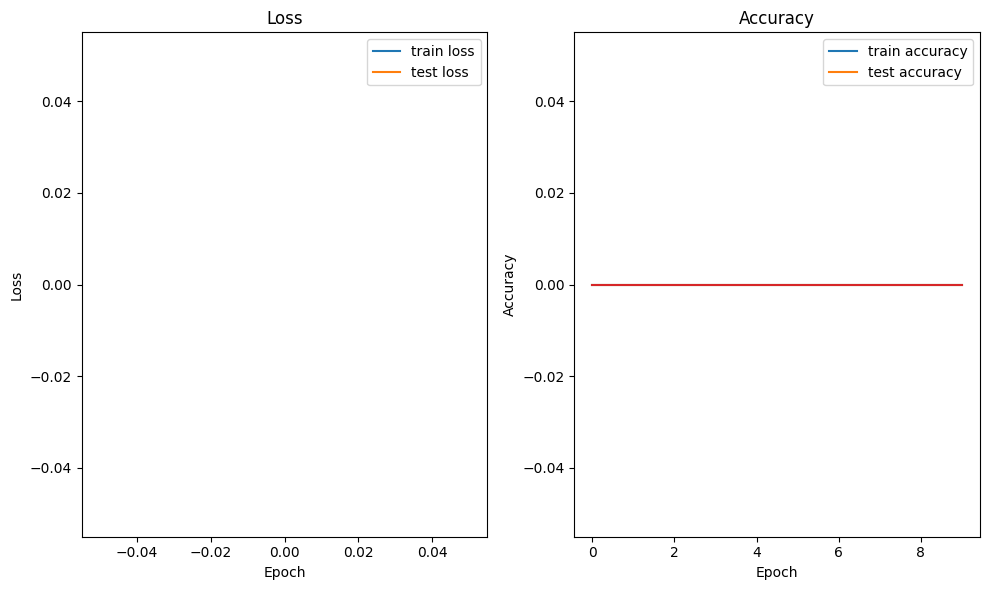

In [ ]:
# Train the best model with all available data
best_model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

# Get the history of the best model
best_model_history = best_model.history.history

# Plot the metrics of the best model
plot_graph_3([best_model_history])

In [ ]:
type(best_model_history)
for key in (best_model_history):
  print('[key]: ', key)



[key]:  loss
[key]:  val_loss
